In [1]:
#!git clone https://github.com/pieper/dicomsort.git
!pip install pydicom
#!python dicomsort/dicomsort.py --help

fatal: destination path 'dicomsort' already exists and is not an empty directory.
     |████████████████████████████████| 2.0 MB 8.5 MB/s eta 0:00:01


In [2]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [8]:
#!git clone https://github.com/pieper/dicomsort.git

fatal: destination path 'dicomsort' already exists and is not an empty directory.


In [3]:
!pip install pylidc

     |████████████████████████████████| 5.6 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 50.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 57.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 100.5 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 102.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 87.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 88.5 MB/s eta 0:00:01
     |████████████████████████████████| 150 kB 62.0 MB/s eta 0:00:01


In [1]:
!python dicomsort/dicomsort.py --help


% dicomsort.py --help
dicomsort [options...] sourceDir targetDir/<patterns>

 where [options...] can be:
    [-z,--compressTargets] - create a .zip file in the target directory
    [-d,--deleteSource] - remove source files/directories after sorting
    [-f,--forceDelete] - remove source without confirmation
    [-k,--keepGoing] - report but ignore dupicate target files
    [-v,--verbose] - print diagnostics while processing
    [-s,--symlink] - create a symlink to dicom files in sourceDir instead of copying them
    [-t,--test] - run the built in self test (requires internet)
    [-u,--unsafe] - do not replace unsafe characters with '_' in the path
    [--help] - print this message

 where sourceDir is directory to be scanned or "" (null string) to read file list from stdin

 where targetDir/<patterns...> is a string defining the output file and directory
 names based on the dicom tags in the file.

If patterns are not specified, the following default is used:

  %PatientName-%Modalit

In [4]:
import pylidc as pl
from pylidc.utils import consensus
import pydicom as dicom
from skimage.measure import find_contours

In [5]:
pl.query(pl.Scan).count()

1018

In [6]:
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
scan.study_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178'

In [7]:
scan.cluster_annotations()

[[Annotation(id=84,scan_id=12),
  Annotation(id=85,scan_id=12),
  Annotation(id=86,scan_id=12),
  Annotation(id=87,scan_id=12)]]

In [28]:
!python dicomsort/dicomsort.py -u patient_001_download patient_001_download_sorted/%PatientID/%StudyInstanceUID/%SeriesInstanceUID/%SOPInstanceUID.dcm

100%|█████████████████████████████████████████| 147/147 [00:03<00:00, 40.52it/s]
Files sorted


In [455]:
!python dicomsort/dicomsort.py -u patient_001_download patient_all_download_sorted/%PatientID/%StudyInstanceUID/%SeriesInstanceUID/%SOPInstanceUID.dcm

100%|█████████████████████████████████████████| 842/842 [00:19<00:00, 42.81it/s]
Files sorted


In [206]:
# f = open ('/.pylidcrc','w')            #For GCP
# #f = open ('/home/root/.pylidcrc','w')    #For Colab
# #f = open ('/root/.pylidcrc','w')    #For Colab
# f.write('[dicom]'+'\n')
# f.write('path =' + '/app/data_forted_new/' +'\n')
# f.write('warn = True')
# f.close()

In [8]:
f = open ('/.pylidcrc','w')            #For GCP
#f = open ('/home/root/.pylidcrc','w')    #For Colab
#f = open ('/root/.pylidcrc','w')    #For Colab
f.write('[dicom]'+'\n')
f.write('path =' + '/app/patient_all_download_sorted/' +'\n')
f.write('warn = True')
f.close()

In [9]:
cat /.pylidcrc

[dicom]
path =/app/patient_all_download_sorted/
warn = True

In [10]:
pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(['LIDC-IDRI-0001']))[0].study_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178'

In [4]:
!python dicomsort/dicomsort.py -u data data_sorted/%PatientID/%StudyInstanceUID/%SeriesInstanceUID/%SOPInstanceUID.dcm

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 20.62it/s]
Files sorted


In [9]:
!pip install pylidc

In [11]:
!conda install pydicom --channel conda-forge

/bin/dash: 1: conda: not found


In [12]:
import os
data_folder = os.getcwd() + '/patient_all_download_sorted/'
data_folder

'/app/patient_all_download_sorted/'

In [71]:
!conda install pydicom --channel conda-forge --y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/anaconda3

  added / updated specs:
    - pydicom


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h578d9bd_1         3.1 MB  conda-forge
    pydicom-2.2.1              |     pyh6c4a22f_0         1.4 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.5 MB

The following NEW packages will be INSTALLED:

  pydicom            conda-forge/noarch::pydicom-2.2.1-pyh6c4a22f_0
  python_abi         conda-forge/linux-64::python_abi-3.8-2_cp38


In [12]:
data_folder

'/app/patient_all_download_sorted/'

In [13]:
f = open ('/root/.pylidcrc','w')            #For GCP, Linux, Linux in Docker 
#f = open ('/home/root/.pylidcrc','w')    #For Colab
f.write('[dicom]'+'\n')
f.write('path =' + data_folder +'\n')
f.write('warn = True')
f.close()

In [43]:
# #f = open ('.pylidcrc','w')            #For GCP
# f = open ('/home/root/.pylidcrc','w')    #For Colab
# f.write('[dicom]'+'\n')
# f.write('path =' + data_folder +'\n')
# f.write('warn = True')
# f.close()

In [14]:
import pylidc as pl
from pylidc.utils import consensus

In [15]:
import pydicom as dicom
import os

In [16]:
pl.query(pl.Scan)[0].patient_id

'LIDC-IDRI-0078'

In [17]:
cohort = data_folder
patient_list = os.listdir(cohort)
patient_select = 0

print ("Current patient ID =", patient_list[patient_select])

scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))

FileNotFoundError: [Errno 2] No such file or directory: '/app/patient_all_download_sorted/'

In [18]:
#data_folder = '/app/patient_001_download_sorted/'
data_folder = '/app/patient_all_download_sorted/'

In [24]:
cohort = data_folder
patient_list = os.listdir(cohort)
patient_select = 0
print('patients = {}'.format(patient_list))
print ("Current patient ID =", patient_list[patient_select])

scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
nodules_annotation = scan[patient_select].cluster_annotations()
# the call below is when pylidc first uses the DICOM images from the directory
vol = scan[patient_select].to_volume()

patients = ['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004']
Current patient ID = LIDC-IDRI-0001
Loading dicom files ... This may take a moment.


In [25]:
vol.shape

(512, 512, 133)

In [26]:
patient_list

['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004']

In [27]:
nodules_annotation

[[Annotation(id=84,scan_id=12),
  Annotation(id=85,scan_id=12),
  Annotation(id=86,scan_id=12),
  Annotation(id=87,scan_id=12)]]

In [28]:
cmask, cbbox, masks = consensus(nodules_annotation[0])

In [29]:
#the consensus bounding box
cbbox

(slice(340, 392, None), slice(297, 341, None), slice(86, 95, None))

In [30]:
#cmask tells us the region in the volume that has the nodule as per the annotations, this is the consensus mask
cmask.shape

(52, 44, 9)

In [31]:
#mask tells us the region in the volume that has the nodule as per the annotations, for each of the annotations / annotators
#there are 4 annotations here, so there are 4 masks, the cmask is arrived at by looking at the each of the masks and arriving at the consensus
len(masks)

4

In [32]:
for m in masks:
    print(m.shape)

(52, 44, 9)
(52, 44, 9)
(52, 44, 9)
(52, 44, 9)


Number of masks = 4
Shape of the masks ...
(52, 44, 9)
(52, 44, 9)
(52, 44, 9)
(52, 44, 9)


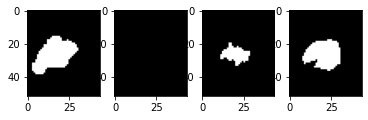

In [33]:
import matplotlib.pyplot as plt
print("Number of masks = {}".format(len(masks)))
print("Shape of the masks ...")
for m in masks:
    print(m.shape)
f, a = plt.subplots(1,len(masks))
for i in range(len(masks)):
    m1 = masks[i][:,:,0].astype(float)
    a[i].imshow(m1, cmap='gray')

Number of masks = 4
Shape of the masks ...
(52, 44, 9)
(52, 44, 9)
(52, 44, 9)
(52, 44, 9)


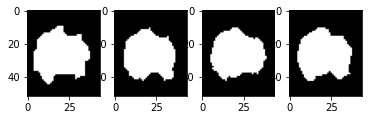

In [34]:
import matplotlib.pyplot as plt
print("Number of masks = {}".format(len(masks)))
print("Shape of the masks ...")
for m in masks:
    print(m.shape)
f, a = plt.subplots(1,len(masks))
for i in range(len(masks)):
    m1 = masks[i][:,:,5].astype(float)
    a[i].imshow(m1, cmap='gray')

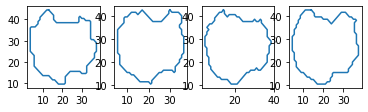

In [35]:
#to plot the outline of the masks in a 2d surface, we need to determine the mask contours in the x,y plane of the image
f, a = plt.subplots(1,len(masks), figsize=(6,1.5))
for i in range(len(masks)):
    mask = masks[i][:,:,5].astype(float)
    c = find_contours(mask, 0.5)[0]
    a[i].plot(c[:,1],c[:,0])

In [36]:
#prepare the data
cmask_CT = [] # store the consensus mask, this is a 3d numpy array
cbbox_CT = [] # store the consensus bounding box, this is a tuple, with 3 elements, one for each of the dimensions, x, y and z of the volume
masks_CT = [] # store the original masks, one per annotation, this is a list of 4 3d numpy arrays

for nodule_idx, nodule in enumerate(nodules_annotation):
    cmask, cbbox, masks = consensus(nodule)
    cmask_CT.append(cmask)
    cbbox_CT.append(cbbox)
    masks_CT.append(masks) 
#we still do not have the image data, its in the volume (vol)

In [37]:
cmask, cbbox, masks = consensus(nodules_annotation[0])

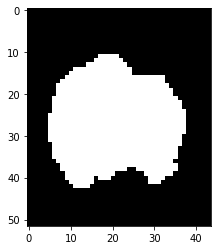

In [38]:
f, a = plt.subplots(1,1)
#this is the consesus mask
a.imshow(cmask[:,:,5], cmap="gray")
#cmask.shape

In [39]:
import numpy as np
CT_mask = np.zeros_like(vol)
print(CT_mask.shape)
CT_mask[cbbox].shape

(512, 512, 133)


(52, 44, 9)

In [40]:
#fill up the new volume, set the cmask region
CT_mask[cbbox] += cmask

In [41]:
cbbox

(slice(340, 392, None), slice(297, 341, None), slice(86, 95, None))

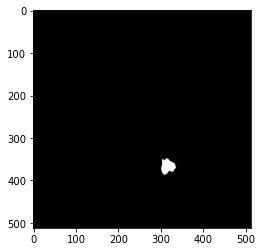

In [42]:
f, a = plt.subplots(1,1)
#this is the consesus mask
#let's see if we set the mask correctly, the slice should be one among the cbbox 3rd dimension
a.imshow(CT_mask[:,:,90], cmap="gray")

In [43]:
np.unique(CT_mask[:,:,90])

array([0, 1], dtype=int16)

In [44]:
# for each nodule, the intensity of the pixel value is augmented (incremented by 1), so overlapping anotations will end up increasing the value of the pixel
# for i in range(nodule_num):
#         cmask = cmask_CT[i]
#         cbbox = cbbox_CT[i]
#         masks = masks_CT[i]    
#         CT_mask[cbbox] += cmask

In [45]:
# The image data i.e. the vol and the CT_mask both have the same dimension now

In [46]:
#prepare the dataset for training
cohort = data_folder
patient_list = os.listdir(cohort)
patient_list

['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004']

In [47]:
CT_image_data = []
CT_mask_data  = []

for pa in range(len(patient_list)):
    print ("Current patient ID =", patient_list[pa])
    
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
    nodules_annotation = scan[pa].cluster_annotations()
    vol = scan[pa].to_volume()
    
    CT_image_data.append(vol)
    
    cmask_CT = []
    cbbox_CT = []
    masks_CT = []
    for nodule_idx, nodule in enumerate(nodules_annotation):
        cmask, cbbox, masks = consensus(nodule)
        cmask_CT.append(cmask)
        cbbox_CT.append(cbbox)
        masks_CT.append(masks)   

    CT_mask = np.zeros_like(vol)    
    nodule_num = len(cmask_CT)
    
    for i in range(nodule_num):
        cmask = cmask_CT[i]
        cbbox = cbbox_CT[i]
        masks = masks_CT[i]    
        CT_mask[cbbox] += cmask
        
    CT_mask_data.append(CT_mask)

Current patient ID = LIDC-IDRI-0001
Loading dicom files ... This may take a moment.
Current patient ID = LIDC-IDRI-0002
Loading dicom files ... This may take a moment.
Current patient ID = LIDC-IDRI-0003
Loading dicom files ... This may take a moment.
Current patient ID = LIDC-IDRI-0004
Loading dicom files ... This may take a moment.


In [48]:
#there is only one image data for the patient, which has 133 slices
print(CT_image_data[0].shape[2])
#for each slice, the slice and the mask will be written to a file for training, i.e. we write a 2d image / numpy array and a 2d mask to a file

133


In [49]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing 

In [50]:
input_image = CT_image_data[0][:,:,0]
input_mask = CT_mask_data[0][:,:,0]

In [51]:
def normalize(input_image):#, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    #input_mask -= 1
    return input_image#, input_mask

In [52]:
norm_inp_image = normalize(input_image)

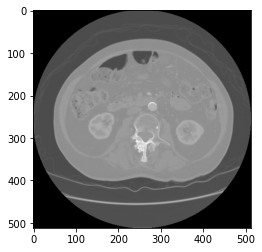

In [53]:
f, a = plt.subplots(1,1)
#this is the consesus mask
#let's see if we set the mask correctly, the slice should be one among the cbbox 3rd dimension
a.imshow(norm_inp_image, cmap="gray")

In [133]:
# def load_image(CT_image_data, CT_mask_data):
#     #use nearest, to prevent the labels from changing
#     input_image = tf.image.resize(CT_image_data, (128, 128), method='nearest')
#     #input_mask = tf.image.resize(CT_mask_data, (128, 128), method='nearest')
#     input_mask = tf.image.resize(CT_mask_data, (128, 128), method='nearest')

#     input_image = normalize(input_image)

#     return input_image, input_mask

In [162]:
def load_image(CT_image_data, CT_mask_data):
    #use nearest, to prevent the labels from changing
    input_image = CT_image_data#crop
    #input_mask = tf.image.resize(CT_mask_data, (128, 128), method='nearest')
    input_mask = CT_mask_data#tf.image.resize(CT_mask_data, (128, 128), method='nearest')

    input_image = normalize(input_image)

    return input_image, input_mask

In [163]:
load_image(CT_image_data[0], CT_mask_data[0])

(<tf.Tensor: shape=(512, 512, 133), dtype=float32, numpy=
 array([[[-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         ...,
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373]],
 
        [[-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.031373],
         ...,
         [-8.031373, -8.031373, -8.031373, ..., -8.031373, -8.031373,
          -8.

In [164]:
CT_image_data[0].shape

(512, 512, 133)

In [57]:
#np.unique(mask_data[:,:,90])

In [165]:
image_data = CT_image_data[0]
mask_data = CT_mask_data[0]
image, mask = load_image(tf.expand_dims(image_data[:,:,0], -1), tf.expand_dims(mask_data[:,:,0], -1))

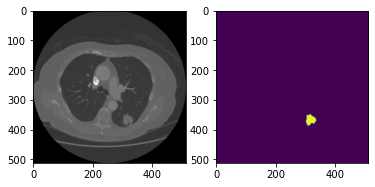

In [166]:
slice_index = 90 # know which slice ranges to choose from, look at the cbbox from the consensus output for the annotation
image_data = CT_image_data[0]
mask_data = CT_mask_data[0]
image, mask = load_image(tf.expand_dims(image_data[:,:,slice_index], -1), tf.expand_dims(mask_data[:,:,slice_index], -1))
f, a = plt.subplots(1,2)
#this is the consesus mask
#let's see if we set the mask correctly, the slice should be one among the cbbox 3rd dimension
a[0].imshow(image, cmap="gray")
a[1].imshow(mask)

In [95]:
np.unique(mask)

array([0, 1], dtype=int16)

In [61]:
# img = tf.image.resize(tf.expand_dims(mask_data[:,:,slice_index], -1), (128, 128), method='nearest')
# np.unique(img)

In [134]:
# get the dataset generator
def get_train_data_generator_bodytext(image_data, mask_data):
    for i in range(image_data.shape[2]):
        image, mask = load_image(tf.expand_dims(image_data[:,:,i], -1), tf.expand_dims(mask_data[:,:,i], -1))
        yield image, tf.keras.utils.to_categorical(mask, num_classes=2)
        # yield image, mask
def get_train_dataset(image_data, mask_data):
    generator = lambda: get_train_data_generator_bodytext(image_data, mask_data)
    return tf.data.Dataset.from_generator(
        generator, output_signature=(
            tf.TensorSpec(shape=(128, 128, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(128, 128, 2), dtype=tf.float32)))

In [175]:
#alternate, for more than one patient
# get the dataset generator
def get_train_data_generator_bodytext(CT_image_data, CT_mask_data):
    for i in range(len(CT_image_data)):
        for j in range(CT_image_data[i].shape[2]):
            image, mask = load_image(tf.expand_dims(CT_image_data[i][:,:,j], -1), tf.expand_dims(CT_mask_data[i][:,:,j], -1))
            yield image, tf.keras.utils.to_categorical(mask, num_classes=2)
        # yield image, mask
def get_train_dataset(CT_image_data, CT_mask_data):
    generator = lambda: get_train_data_generator_bodytext(CT_image_data, CT_mask_data)
    return tf.data.Dataset.from_generator(
        generator, output_signature=(
            tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(512, 512, 2), dtype=tf.float32)))

In [188]:
ds_train = get_train_dataset(CT_image_data,CT_mask_data)
ds_train.element_spec

(TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(512, 512, 2), dtype=tf.float32, name=None))

In [140]:
for d in ds_train.take(1):
    print(d)

(<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]],

       [[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]],

       [[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]],

       ...,

       [[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]],

       [[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]],

       [[-8.031373],
        [-8.031373],
        [-8.031373],
        ...,
        [-8.031373],
        [-8.031373],
        [-8.031373]]], dtype=float32)>, <tf.Tensor: shape=(128, 128, 2), dtype=float32, numpy=
array([[[1., 

In [65]:
len(CT_image_data)

4

In [104]:
ds = get_train_dataset(CT_image_data[0], CT_mask_data[0])
#ds = ds.shuffle(100).batch(12)

In [105]:
ds.element_spec

(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(88, 88, 2), dtype=tf.float32, name=None))

In [106]:
for d,l in ds.take(1):
    print(d.shape)

UnknownError: IndexError: tuple index out of range
Traceback (most recent call last):

  File "/root/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/root/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/root/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "<ipython-input-101-c7a3c4bdefe1>", line 5, in get_train_data_generator_bodytext
    for j in range(CT_image_data[i].shape[2]):

IndexError: tuple index out of range


	 [[{{node PyFunc}}]]

In [189]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        #print(display_list[i])
        plt.imshow(display_list[i])
        #plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [67]:
for images, masks in ds.shuffle(100).take(5):
    sample_image, sample_mask = images, masks[:,:,0]
    display([sample_image, sample_mask])

NameError: name 'ds' is not defined

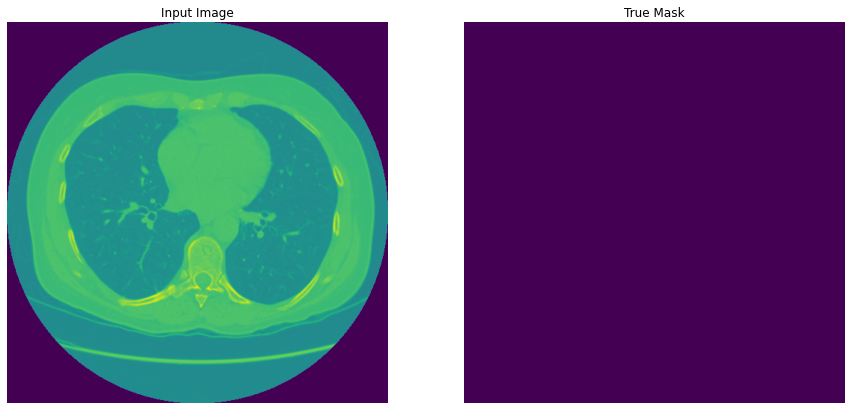

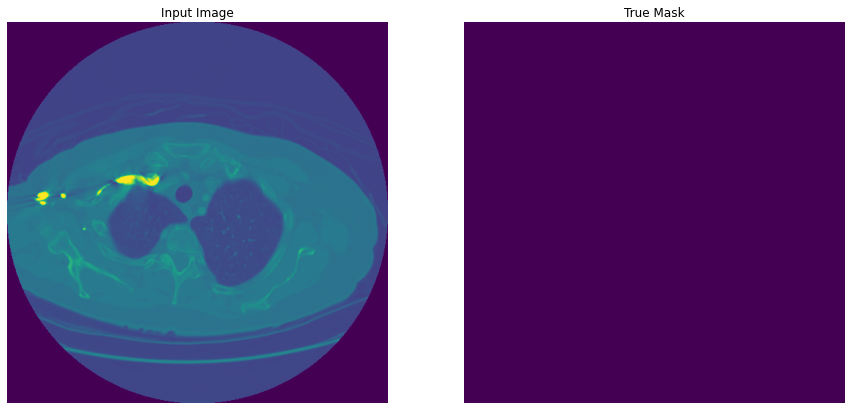

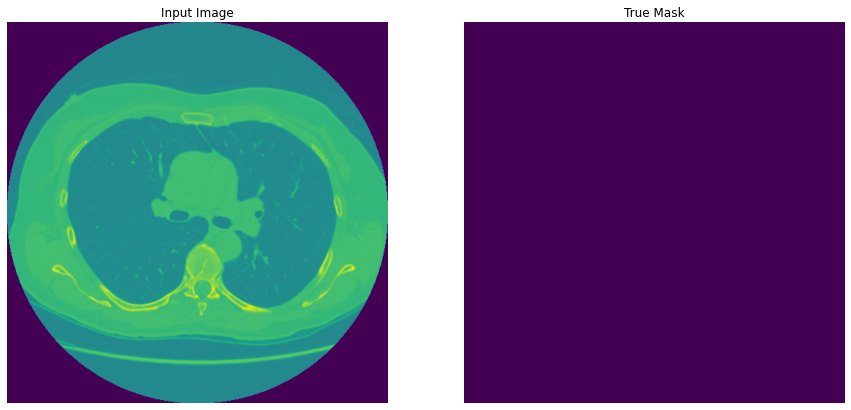

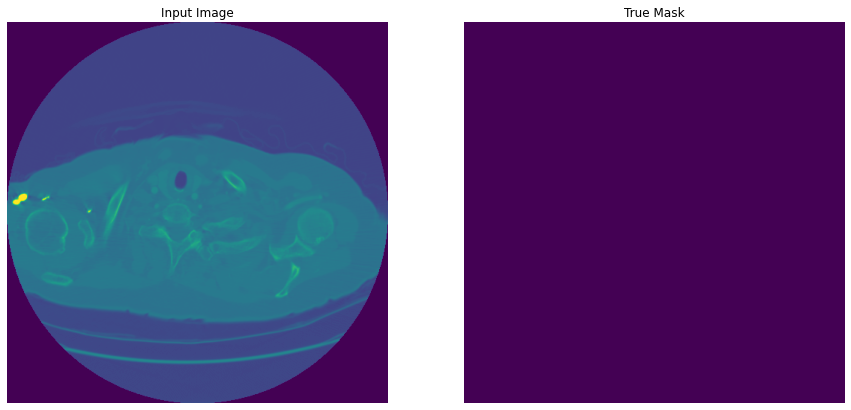

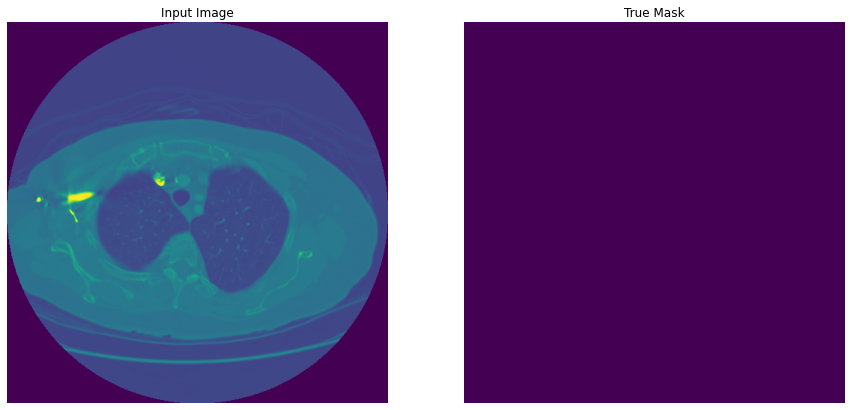

In [190]:
for images, masks in ds_train.shuffle(300).take(5):
    sample_image, sample_mask = images, masks[:,:,0]
    display([sample_image, sample_mask])

In [74]:
!pip install git+https://github.com/jakeret/unet.git

  Cloning https://github.com/jakeret/unet.git to /tmp/pip-req-build-g0l0p_5w
  Running command git clone -q https://github.com/jakeret/unet.git /tmp/pip-req-build-g0l0p_5w
  Resolved https://github.com/jakeret/unet.git to commit f557a51b6f95aae6848cab6141e6cae573934bf8


In [75]:
import unet
from unet.datasets import circles

In [179]:
LEARNING_RATE = 1e-3
unet_model = unet.build_model(channels=1,
                              num_classes=2,
                              layer_depth=2,
                              filters_root=64)
unet.finalize_model(unet_model, learning_rate=LEARNING_RATE)

In [180]:
unet_model.summary()

Model: "unet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv_block_24 (ConvBlock)       (None, None, None, 6 37568       inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, None, None, 6 0           conv_block_24[0][0]              
__________________________________________________________________________________________________
conv_block_25 (ConvBlock)       (None, None, None, 1 221440      max_pooling2d_9[0][0]            
_______________________________________________________________________________________________

In [181]:
unet_model.inputs

[<KerasTensor: shape=(None, None, None, 1) dtype=float32 (created by layer 'inputs')>]

In [150]:
ds_train

<FlatMapDataset shapes: ((128, 128, 1), (128, 128, 2)), types: (tf.float32, tf.float32)>

In [182]:
ds_train_cropped = ds_train.map(crop_labels_to_shape(prediction_shape)).batch(12)

In [157]:
ds_train_cropped

<BatchDataset shapes: ((None, 128, 128, 1), (None, 112, 112, 2)), types: (tf.float32, tf.float32)>

In [156]:
unet_model.fit(ds_train_cropped, validation_data=ds_train_cropped)

     13/Unknown - 26s 2s/step - loss: 0.7735 - categorical_crossentropy: 0.7735 - categorical_accuracy: 0.4267 - mean_iou: 0.2346 - dice_coefficient: 0.4691 - auc_5: 0.2143

KeyboardInterrupt: 

In [183]:
from typing import Tuple
def crop_to_shape(data, shape: Tuple[int, int, int]):
    """
    Crops the array to the given image shape by removing the border
    :param data: the array to crop, expects a tensor of shape [batches, nx, ny, channels]
    :param shape: the target shape [batches, nx, ny, channels]
    """
    diff_nx = (data.shape[0] - shape[0])
    diff_ny = (data.shape[1] - shape[1])

    if diff_nx == 0 and diff_ny == 0:
        return data

    offset_nx_left = diff_nx // 2
    offset_nx_right = diff_nx - offset_nx_left
    offset_ny_left = diff_ny // 2
    offset_ny_right = diff_ny - offset_ny_left

    cropped = data[offset_nx_left:(-offset_nx_right), offset_ny_left:(-offset_ny_right)]

    assert cropped.shape[0] == shape[0]
    assert cropped.shape[1] == shape[1]
    return cropped
def crop_labels_to_shape(shape: Tuple[int, int, int]):
    def crop(image, label):
        return image, crop_to_shape(label, shape)
    return crop

In [184]:
from tensorflow.keras import Model
def get_output_shape(model: Model,
                          train_dataset: tf.data.Dataset):
        return model.predict(train_dataset
                             .take(count=1)
                             .batch(batch_size=1)
                             ).shape

In [185]:
prediction_shape = get_output_shape(unet_model, ds_train)[1:]
print(prediction_shape)

(496, 496, 2)


In [186]:
ds_train.map(crop_labels_to_shape(prediction_shape))

<MapDataset shapes: ((512, 512, 1), (496, 496, 2)), types: (tf.float32, tf.float32)>

In [187]:
trainer = unet.Trainer(checkpoint_callback=False,
                       learning_rate_scheduler=unet.SchedulerType.WARMUP_LINEAR_DECAY,
                       warmup_proportion=0.1,
                       learning_rate=LEARNING_RATE)
trainer.fit(unet_model,
            ds_train,
            ds_train,
            epochs=25,
            batch_size=1)

Epoch 1/25
    206/Unknown - 2264s 11s/step - loss: 0.6797 - categorical_crossentropy: 0.6797 - categorical_accuracy: 0.7478 - mean_iou: 0.2581 - dice_coefficient: 0.5161 - auc_6: 0.6177

KeyboardInterrupt: 

In [ ]:

unet_model.predict()

## UNET from scratch

In [94]:
from tensorflow.keras import layers
# declaring the input layer
# In the original paper the network consisted of only one channel.
inputs = layers.Input(shape=(128, 128, 1))
# first part of the U - contracting part
c0 = layers.Conv2D(64, activation='relu', kernel_size=3)(inputs)
print("c0.shape=",c0.shape)
c1 = layers.Conv2D(64, activation='relu', kernel_size=3)(c0)  # This layer for concatenating in the expansive part
print("c1.shape=", c1.shape)
c2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c1)
print("c2.shape=", c2.shape)
c3 = layers.Conv2D(128, activation='relu', kernel_size=3)(c2)
print("c3.shape=", c3.shape)
c4 = layers.Conv2D(128, activation='relu', kernel_size=3)(c3)  # This layer for concatenating in the expansive part
print("c4.shape=", c3.shape)
c5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c4)
print("c5.shape=", c5.shape)
c6 = layers.Conv2D(256, activation='relu', kernel_size=3)(c5)
print("c6.shape=", c6.shape)
c7 = layers.Conv2D(256, activation='relu', kernel_size=3)(c6)  # This layer for concatenating in the expansive part
print("c7.shape=", c7.shape)
c8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c7)
print("c8.shape=", c8.shape)
c9 = layers.Conv2D(512, activation='relu', kernel_size=3)(c8)
print("c9.shape=", c9.shape)
c10 = layers.Conv2D(512, activation='relu', kernel_size=3)(c9)  # This layer for concatenating in the expansive part
print("c10.shape=", c10.shape)
c11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c10)
print("c11.shape=", c11.shape)
c12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(c11)
print("c12.shape=", c12.shape)
c13 = layers.Conv2D(1024, activation='relu', kernel_size=3, padding='valid')(c12)
print("c13.shape=", c13.shape)
# We will now start the second part of the U - expansive part
t01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(c13)
crop01 = layers.Cropping2D(cropping=(4, 4))(c10)

concat01 = layers.concatenate([t01, crop01], axis=-1)

c14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
c15 = layers.Conv2D(512, activation='relu', kernel_size=3)(c14)

t02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(c15)
crop02 = layers.Cropping2D(cropping=(16, 16))(c7)

concat02 = layers.concatenate([t02, crop02], axis=-1)

c16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
c17 = layers.Conv2D(256, activation='relu', kernel_size=3)(c16)

t03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(c17)
crop03 = layers.Cropping2D(cropping=(40, 40))(c4)

concat03 = layers.concatenate([t03, crop03], axis=-1)

c18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
c19 = layers.Conv2D(128, activation='relu', kernel_size=3)(c18)

t04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(c19)
crop04 = layers.Cropping2D(cropping=(88, 88))(c1)

concat04 = layers.concatenate([t04, crop04], axis=-1)

c20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
c21 = layers.Conv2D(64, activation='relu', kernel_size=3)(c20)

outputs = layers.Conv2D(2, kernel_size=1)(c21)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")

c0.shape= (None, 126, 126, 64)
c1.shape= (None, 124, 124, 64)
c2.shape= (None, 62, 62, 64)
c3.shape= (None, 60, 60, 128)
c4.shape= (None, 60, 60, 128)
c5.shape= (None, 29, 29, 128)
c6.shape= (None, 27, 27, 256)
c7.shape= (None, 25, 25, 256)
c8.shape= (None, 12, 12, 256)
c9.shape= (None, 10, 10, 512)
c10.shape= (None, 8, 8, 512)
c11.shape= (None, 4, 4, 512)
c12.shape= (None, 2, 2, 1024)


ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_28/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_28/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,1024], [3,3,1024,1024].

In [118]:
from tensorflow.keras import layers
import tensorflow as tf
# declaring the input layer
# In the original paper the network consisted of only one channel.
inputs = layers.Input(shape=(128, 128, 1))
# first part of the U - contracting part
c0 = layers.Conv2D(16, activation='relu', kernel_size=3)(inputs)
c1 = layers.Conv2D(16, activation='relu', kernel_size=3)(c0)  # This layer for concatenating in the expansive part
c2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c1)
c3 = layers.Conv2D(32, activation='relu', kernel_size=3)(c2)
c4 = layers.Conv2D(32, activation='relu', kernel_size=3)(c3)  # This layer for concatenating in the expansive part
c5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c4)
# c6 = layers.Conv2D(64, activation='relu', kernel_size=3)(c5)
# print("c6.shape=", c6.shape)
# c7 = layers.Conv2D(64, activation='relu', kernel_size=3)(c6)  # This layer for concatenating in the expansive part
# print("c7.shape=", c7.shape)
# c8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c7)
# print("c8.shape=", c8.shape)
# c9 = layers.Conv2D(128, activation='relu', kernel_size=3)(c8)
# print("c9.shape=", c9.shape)
# c10 = layers.Conv2D(128, activation='relu', kernel_size=3)(c9)  # This layer for concatenating in the expansive part
# print("c10.shape=", c10.shape)
# c11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(c10)
# print("c11.shape=", c11.shape)
c6 = layers.Conv2D(64, activation='relu', kernel_size=3)(c5)
c7 = layers.Conv2D(64, activation='relu', kernel_size=3, padding='valid')(c6)

# We will now start the second part of the U - expansive part
t01 = layers.Conv2DTranspose(32, kernel_size=2, strides=(2, 2), activation='relu')(c7)
crop01 = layers.Cropping2D(cropping=(4, 4))(c4)

concat01 = layers.concatenate([t01, crop01], axis=-1)

c14 = layers.Conv2D(32, activation='relu', kernel_size=3)(concat01)
c15 = layers.Conv2D(32, activation='relu', kernel_size=3)(c14)


t02 = layers.Conv2DTranspose(16, kernel_size=2, strides=(2, 2), activation='relu')(c15)
crop02 = layers.Cropping2D(cropping=(16, 16))(c1)


concat02 = layers.concatenate([t02, crop02], axis=-1)


c16 = layers.Conv2D(16, activation='relu', kernel_size=3)(concat02)
c17 = layers.Conv2D(16, activation='relu', kernel_size=3)(c16)

outputs = layers.Conv2D(2, kernel_size=1)(c17)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")

In [119]:
model.build(input_shape=(None, 128, 128, 1))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_221 (Conv2D)             (None, 126, 126, 16) 160         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_222 (Conv2D)             (None, 124, 124, 16) 2320        conv2d_221[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_50 (MaxPooling2D) (None, 62, 62, 16)   0           conv2d_222[0][0]                 
_________________________________________________________________________________________

In [113]:
BATCH_SIZE = 8
BUFFER_SIZE = 300
EPOCHS = 20
train_dataset = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).cache()

In [111]:
ds_train.element_spec

(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 2), dtype=tf.float32, name=None))

In [121]:
model.fit(train_dataset, epochs=3, validation_data=train_dataset)

Epoch 1/3


ValueError: in user code:

    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:408 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:618 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3272 categorical_accuracy
        math_ops.equal(
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/math_ops.py:1679 equal
        return gen_math_ops.equal(x, y, name=name)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_math_ops.py:3177 equal
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 128 and 88 for '{{node Equal}} = Equal[T=DT_INT64, incompatible_shape_error=true](ArgMax, ArgMax_1)' with input shapes: [?,128,128], [?,88,88].


### The model

In [559]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 1], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

ValueError: The input must have 3 channels; got `input_shape=[128, 128, 1]`

In [330]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-r41usqah
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-r41usqah
  Resolved https://github.com/tensorflow/examples.git to commit 46f07cd0cd16cefc0c2cf6910b9c7d67d7c8ddeb
  Created wheel for tensorflow-examples: filename=tensorflow_examples-46f07cd0cd16cefc0c2cf6910b9c7d67d7c8ddeb_-py3-none-any.whl size=271350 sha256=20a273ff0654be9a30aee4fc3c881dba131b6bf606c9f21a1f4691841a58c14b
  Stored in directory: /tmp/pip-ephem-wheel-cache-amdl8vno/wheels/4e/f5/c2/bfe75b834c9028b2529023bf74541c46ead531b513a8010d21
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa

In [331]:
from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [539]:
def unet_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

    x = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x)

In [544]:
OUTPUT_CLASSES = 2

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [545]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [548]:
ds_train.element_spec

(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 2), dtype=tf.float32, name=None))

In [558]:
for image, mask in ds_train.take(1):
    print(image.shape)
    print(mask.shape)

(128, 128, 1)
(128, 128, 2)


In [556]:
def show_element_specictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image, mask, create_mask(pred_mask)])
    else:
        display([image, mask,
                 create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [557]:
show_predictions()

ValueError: in user code:

    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer Conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 128, 128, 1)


(105, 2)


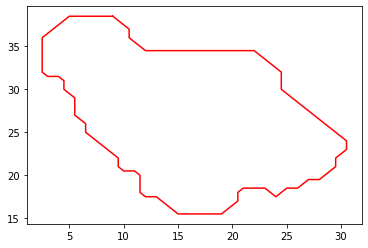

In [35]:
j=0
k=0
colors = ['r', 'g', 'b', 'y']
for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        print(c.shape)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

(105, 2)


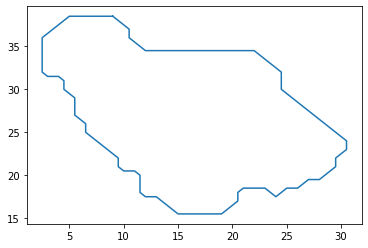

In [36]:
m = masks[0][:,:,0].astype(float)
c1 = None
for c in find_contours(m, 0.5):
        print(c.shape)
        c1 = c
        plt.plot(c[:,1], c[:,0])

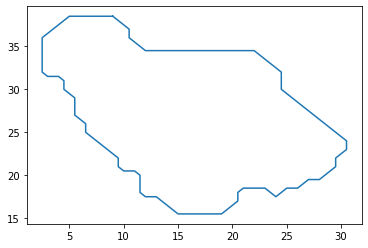

In [152]:
import matplotlib.pyplot as plt
cs = [c for c in find_contours(m, 0.5)]
plt.plot(cs[0][:,1], cs[0][:,0])

In [37]:
cbbox[2].start

86

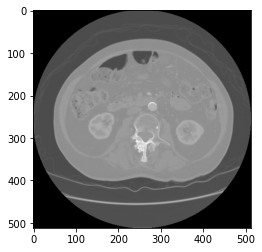

In [38]:
import matplotlib.pyplot as plt
plt.subplots(1,1)
plt.imshow(vol[:,:,0], cmap='gray')

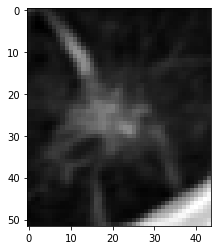

In [39]:
import matplotlib.pyplot as plt
plt.subplots(1,1)
plt.imshow(vol[cbbox][:,:,0], cmap='gray')

In [58]:
ls /app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/

1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm
1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068.dcm


In [63]:
scan[0]

Scan(id=12,patient_id=LIDC-IDRI-0001)

In [130]:
base = os.path.join('/app/data_sorted/', 'LIDC-IDRI-0001')

In [131]:
base

'/app/data_sorted/LIDC-IDRI-0001'

In [132]:
for dpath, dnames, fnames in os.walk(base):
    print("dp={}, dn={}, fn={}".format(dpath, dnames, fnames))

dp=/app/data_sorted/LIDC-IDRI-0001, dn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511'], fn=['.DS_Store']
dp=/app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511, dn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357'], fn=['.DS_Store']
dp=/app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357, dn=[], fn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm', '1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068.dcm']


In [142]:
for dpath, dnames, fnames in os.walk(base):
    print("dp={}, dn={}, fn={}".format(dpath, dnames, fnames))
    if len(fnames) == 0: continue
    dicom_file = [d for d in fnames if d.endswith(".dcm")]
    print(dicom_file)
    dicom_file = dicom_file[0]
    dimage = dicom.dcmread(os.path.join(dpath, dicom_file))
    seid = str(dimage.SeriesInstanceUID).strip()
    stid = str(dimage.StudyInstanceUID).strip()
    print("seid=", seid)
    print("stid=", stid)

dp=/app/data_sorted/LIDC-IDRI-0001, dn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511'], fn=[]
dp=/app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511, dn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357'], fn=[]
dp=/app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357, dn=[], fn=['1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm', '1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068.dcm']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm', '1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068.dcm']
seid= 1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357
stid= 1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511


In [170]:
scan[0].series_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192'

In [171]:
scan[0].study_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178'

In [107]:
ls /app/data/manifest-1631530223094/LIDC-IDRI/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/

068.xml  1-1.dcm  1-2.dcm


In [115]:
#debug
dpath = "/app/data/manifest-1631530223094/LIDC-IDRI/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/"
dicom_file = "1-2.dcm"
dimage = dicom.dcmread(os.path.join(dpath, dicom_file))
dimage.SeriesInstanceUID

'1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357'

In [113]:
dimage.StudyInstanceUID

'1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511'

In [116]:
str(dimage.SeriesInstanceUID).strip()

'1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357'

In [121]:
ls /app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/

1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm
1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068.dcm


In [122]:
dpath = "/app/data_sorted/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357/"
dicom_file = "1.3.6.1.4.1.14519.5.2.1.6279.6001.257944242390114100388269195181.dcm"
dimage = dicom.dcmread(os.path.join(dpath, dicom_file))
dimage.SeriesInstanceUID

'1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357'

In [135]:
ls -al /app/data_sorted/LIDC-IDRI-0001

total 0
drwxr-xr-x 3 root root  96 Sep 13 11:46 ./
drwxr-xr-x 4 root root 128 Sep 13 11:38 ../
drwxr-xr-x 4 root root 128 Sep 13 11:38 1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118199124641098335511/


In [139]:
rm -rf /app/data_sorted/LIDC-IDRI-0001/*/*/.DS_Store